## Notations
- $D$: data of future experiments
- $\eta$: design parameters
- $\phi$: parameters of interest (which are relevant for future experimental scenarios)
- $U(D, \eta)$: a utility function to evaluate different designs
- $EU(\eta)$: expected utility $EU(\eta) = \int dD \, p(D|\eta) \, U(D, \eta)$

## Expected utility function
$$
EU_{KL} (\eta) = \int dD \, d\phi \, p(\phi) \, p(D|\phi, \eta) \, \log\frac{p(D|\phi, \eta)}{p(D|\eta)}
$$

## Simplified setup for interferometry

### Prior distribution $p(\phi)$
The electron density is the highest at the plasma core and close to zero at the edge, and it usually decrease monotonically from core to edge. Here we simply assume the 1D density profile to be parabolic form: 
$$
n_e(\rho) = -a (\rho^2 - 1)
$$

For example, when $a=1$:

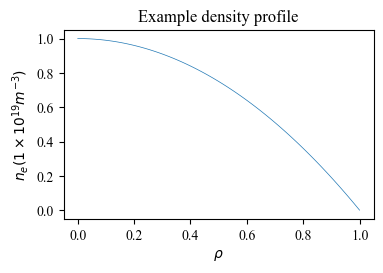

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams["lines.linewidth"] = 0.5
mpl.rcParams["lines.markersize"] = 4
mpl.rcParams["figure.dpi"] = 100

x = np.linspace(0.0, 1.0, 101)
y = -x**2 + 1

plt.figure(figsize=(4, 2.5))
plt.plot(x, y)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$n_e (1 \times 10^{19} m^{-3})$')
plt.title('Example density profile')
plt.show()

With this extremly simplified formulization of density profile, $\phi$ will contain only **ONE** parameter, i.e., $\phi = [a]$

Then we can assign a proper **prior distribution** for $\phi$ in order to cover a range of possible density profiles of our interest.

For example:
$$
p(\phi)=\left\{\begin{array}{l}
const. \quad 0.5 \leq a \leq 1.5 \\
0 \quad \text { elsewhere }
\end{array}\right.
$$

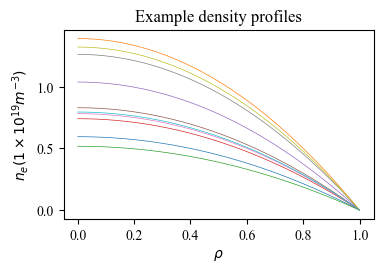

In [2]:
# 10 Sample profiles
a_samples = (1.5 - 0.5) * np.random.rand(10) + 0.5

plt.figure(figsize=(4, 2.5))
for a in a_samples:
    y = - a * (x**2 - 1)
    plt.plot(x, y)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$n_e (1 \times 10^{19} m^{-3})$')
plt.title('Example density profiles')
plt.show()

### Likelihood function $p(D|\phi,\eta)$

Given $\phi$, we get the density profile $\vec{n}_e = [n_e(\rho_1), n_e(\rho_2), ..., n_e(\rho_n)]$, and the corresponding line integrated density can be calculated with a linear forward model $\mathbf{R} \cdot \vec{n}_e$, where the response matrix $\mathbf{R}$ is determined by the design parameters $\eta$.

If we assume the measurement of line integrated density has Gaussian distributed errors, the likelihood distribution will be:
$$
D|\phi, \eta \sim \mathcal{N} (\mathbf{R} \cdot \vec{n}_e, \sigma^2)
$$

## Calculation of $EU_{KL}(\eta)$

1. Draw a pair of values $(D^*, \phi^*)$ from the joint distribution $p(D,\phi|\eta) = p(\phi) p(D|\phi, \eta)$. This can be done by drawing subsequently a set of parameter values $\phi^*$ from $p(\phi)$ and a data vector $D^*$ from $p(D|\phi^*, \eta)$

2. For each pair of values $(D^*, \phi^*)$, calculate and store the values of $p(D^*|\phi^*, \eta)$ and $p(D^*|\eta) = \int p(\phi) \, p(D|\phi, \eta) d\phi$

3. $EU_{KL} (\eta)$ can be estimated as the average of the values of $\log\frac{p(D^*|\phi^*, \eta)}{p(D^*|\eta)}$

## Drawing samples

Starting with only **ONE** beam line, whose position is denoted by $[\theta_1, \theta_2]$

In [3]:
from design import Interferometry

theta_1 = [0]
theta_2 = [1.25 * np.pi]
interf = Interferometry()
# Set design parameters
interf.set_angles(theta_1, theta_2)
interf.draw_samples()
print(f'EU = {interf.calculate_utility_function()}')

EU = 0.3824772730880976


In [4]:
# Change the angles and calculate the new EU function value
theta_1 = [0.5 * np.pi]
theta_2 = [1.5 * np.pi]
interf.set_angles(theta_1, theta_2)
interf.draw_samples()
print(f'EU = {interf.calculate_utility_function()}')

EU = 0.6164890521275663
